# --------> PC Parts Images [Classification] <--------
#### Leveraging Deep Learning for Component Identification

In [8]:
import pandas as pd
import numpy as np
import cv2
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,BatchNormalization,Dropout,Flatten
from keras.applications import DenseNet121,DenseNet201
import matplotlib.pyplot as plt
from keras.callbacks import ModelCheckpoint,EarlyStopping,LearningRateScheduler
from keras import optimizers

In the first cell of my Jupyter notebook, I have imported the necessary libraries and modules required for my project. 

1) Pandas: Imports the pandas which is commonly used for data manipulation and analysis.


2) Numpy: Imports the NumPy which is used for numerical computing with arrays and matrices.


3) cv2: Imports the OpenCV library, which is a popular computer vision library used for image processing and manipulation.


4) ImageDataGenerator class from the Keras library, which is used for data augmentation and preprocessing of images for deep learning models.


5) Sequential class from Keras, which is used to build deep learning models layer by layer.


6) Dense, Conv2D, MaxPooling2D, BatchNormalization, Dropout, Flatten: Imports various layers from Keras that are commonly used in building convolutional neural networks (CNNs) for image classification tasks.


7) DenseNet201: Imports pre-trained DenseNet models from the Keras Applications module. These models will serve as the base architecture for our image classification model.


8) matplotlib.pyplot: Pyplot module from the Matplotlib library, which is used for data visualization.


9) ModelCheckpoint, EarlyStopping, LearningRateScheduler: Imports callback functions from Keras that are used during training to save the best model, stop training early to prevent overfitting, and adjust the learning rate dynamically.


10) optimizers: Imports optimizers from Keras, which are used to optimize the learning process of our neural network model.

In [2]:
# Setting up directories
base_dir = r"C:\Users\akshay wagh\Downloads\archive (27)\pc_parts"


In this cell, I am setting up the main folder where all our PC parts images are stored. This folder contains different folders for each type of PC part, like CPUs, GPUs, and so on.





In [3]:
# Parameters
batch_size = 32
img_height = 256
img_width = 256

In this cell, I am defining some parameters for our image data. These parameters include:

batch_size: This determines the number of images processed at once during training. A smaller batch size requires less memory but may take longer to train the model.


img_height and img_width: These specify the desired height and width of our input images. We're setting them both to 256 pixels here. This ensures that all our images are resized to the same dimensions before being fed into the model.

### Data Preprocessing

In [4]:

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2,
    fill_mode='nearest'
)

Found 2629 images belonging to 14 classes.
Found 650 images belonging to 14 classes.


In this cell, I am setting up an ImageDataGenerator object called train_datagen. This object will generate batches of augmented image data during training. Here's what each parameter does:

- rescale=1./255: Rescales the pixel values of the images to a range between 0 and 1, which helps in training the model more effectively.
- rotation_range=40: Randomly rotates the images by up to 40 degrees.
- width_shift_range=0.2: Randomly shifts the images horizontally by up to 20% of the total width.
- height_shift_range=0.2: Randomly shifts the images vertically by up to 20% of the total height.
- shear_range=0.2: Applies random shear transformations to the images.
- zoom_range=0.2: Randomly zooms into the images by up to 20%.
- horizontal_flip=True: Randomly flips the images horizontally.
- validation_split=0.2: Splits the training data into training and validation sets, with 20% of the data reserved for validation.
- fill_mode='nearest': Specifies the method used for filling in newly created pixels during augmentation.

In [23]:
validation_datagen = ImageDataGenerator(rescale=1./255)

In this cell, I am setting up another ImageDataGenerator object called validation_datagen. This object will be used to generate batches of validation data during the training process. The only transformation applied here is rescaling the pixel values to a range between 0 and 1 using rescale=1./255.

#### Data splitting into training and validation sets:

In [47]:
train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True,
    subset= 'training',
)

Found 2629 images belonging to 14 classes.


In this cell, I am creating a train_generator object using the flow_from_directory method of the train_datagen object.

- base_dir: The directory containing our training images.
- target_size=(img_height, img_width): The dimensions to which all images will be resized.
- batch_size=batch_size: The number of images in each batch.
- class_mode='categorical': The type of labels returned by the generator. Since we're dealing with a classification task with multiple classes, we set it to 'categorical'.
- shuffle=True: Shuffles the order of the images after each epoch to ensure randomness during training.
- subset='training': Specifies that this generator will be used for training data. This is in conjunction with the validation - - split parameter specified earlier in the train_datagen object.

In [48]:
validation_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(img_height, img_width),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    subset= 'validation'
)

Found 650 images belonging to 14 classes.


In this cell, I am creating a validation_generator object using the flow_from_directory method of the train_datagen object. Similar to the train_generator, this generator will yield batches of validation data from the directory specified by base_dir. 

- base_dir: The directory containing our validation images.
- target_size=(img_height, img_width): The dimensions to which all images will be resized.
- color_mode='rgb': Specifies that the images will be read in RGB color mode. This is the default mode, but explicitly specifying it ensures consistency.
- class_mode='categorical': The type of labels returned by the generator. Since we're dealing with a classification task with multiple classes, we set it to 'categorical'.
- batch_size=32: The number of images in each batch. This should match the batch size used for the training generator.
- shuffle=True: Shuffles the order of the images after each epoch to ensure randomness during validation.
- subset='validation': Specifies that this generator will be used for validation data. This is in conjunction with the validation split parameter specified earlier in the train_datagen object.

#### Class Label Assignment

In [21]:
import glob
import os
subfolder_path=glob.glob(base_dir+'/*',recursive=True)
text_labels=[]
for i in subfolder_path:
    a=os.path.basename(i)
    text_labels.append(a)
    
text_labels=sorted(text_labels)
text_labels

['cables',
 'case',
 'cpu',
 'gpu',
 'hdd',
 'headset',
 'keyboard',
 'microphone',
 'monitor',
 'motherboard',
 'mouse',
 'ram',
 'speakers',
 'webcam']

In this cell, I am using the glob module to recursively search for all subdirectories within the base_dir directory. This helps me gather the names of the folders containing different types of PC parts images. Then, I extract the base name of each subdirectory using os.path.basename() and append it to the text_labels list.

#### Data Visualization

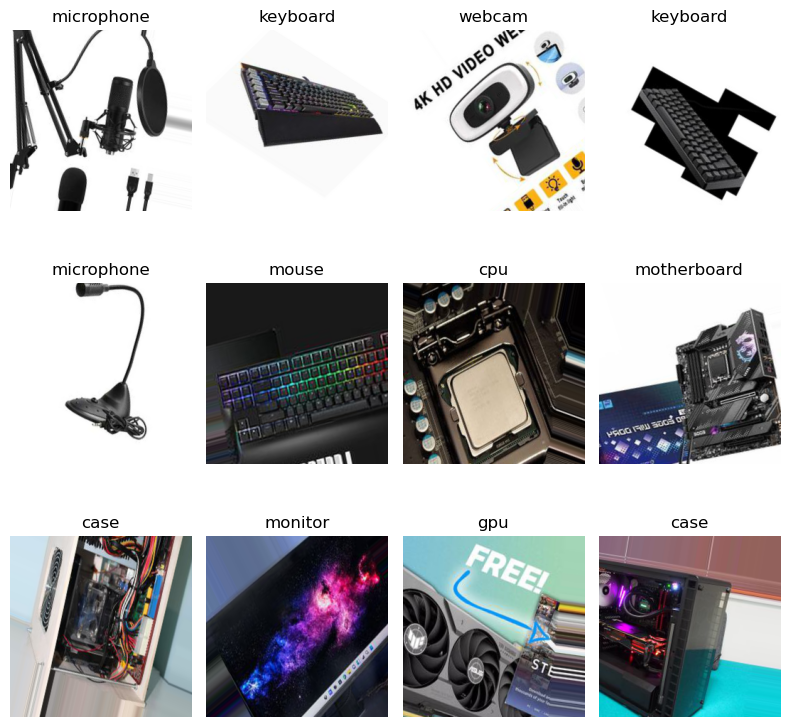

In [22]:
batch_images,batch_labels= train_generator.next()
plt.figure(figsize=(8,8))
for i in range (12):
    plt.subplot(3,4,i+1)
    plt.imshow(batch_images[i],cmap='gray')
    num_index= np.argmax(batch_labels[i])
    plt.title(text_labels[num_index])
    plt.axis('off')
plt.tight_layout()
plt.show()

In this cell, I am visualizing a batch of augmented training images along with their corresponding labels. Here's what each part of the code does:

- batch_images, batch_labels = train_generator.next(): This line fetches the next batch of images and labels from the train_generator. Each time you call next(), it returns the next batch of data.
- plt.figure(figsize=(8, 8)): This line creates a new figure with a size of 8x8 inches for our plot.
- for i in range(12):: This loop iterates over the first 12 images in the batch.
- plt.subplot(3, 4, i + 1): This line sets up a subplot grid with 3 rows and 4 columns, and selects the i+1-th subplot for the current image.
- plt.imshow(batch_images[i], cmap='gray'): This line displays the i-th image from the batch using a grayscale colormap.
- num_index = np.argmax(batch_labels[i]): This line finds the index of the maximum value in the one-hot encoded label for the i-th image.
- plt.title(text_labels[num_index]): This line sets the title of the subplot to the corresponding text label based on the index found in the previous step.
- plt.axis('off'): This line turns off the axis for each subplot to remove the axis labels and ticks.
- plt.tight_layout(): This line adjusts the subplot layout to make sure everything fits nicely.
- plt.show(): This line displays the plot with all the images and their labels.

### Model Building:

In [9]:
model= Sequential()

model.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape= (128,128,1)))
model.add(BatchNormalization())

model.add(Conv2D(filters=512,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(filters=1024,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=1024,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=1024,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(units=1024,activation='relu'))
model.add(Dense(units=512,activation='relu'))
model.add(Dense(units=256,activation='relu'))
model.add(Dense(units=14,activation='softmax'))

In this cell, I have defining our convolutional neural network (CNN) model architecture using the Sequential API from Keras. Here's a breakdown of the layers and their configurations:

- Conv2D: This layer creates a convolutional layer with 32 filters and a kernel size of (3,3). The activation function used is ReLU, and the input shape is set to (128,128,1), indicating that our input images are grayscale images of size 128x128 pixels.

- BatchNormalization: This layer normalizes the activations of the previous layer to ensure that the network trains faster and more reliably.

- Conv2D with 512 filters and a kernel size of (3,3), followed by MaxPooling2D with a pool size of (2,2). This combination creates a deeper layer with increased feature extraction capability and downsamples the feature maps to reduce computational complexity.

- This pattern of alternating Conv2D and MaxPooling2D layers is repeated three more times, gradually increasing the number of filters in each convolutional layer.

- Flatten: This layer flattens the output of the convolutional layers into a one-dimensional array, preparing it for input into the fully connected layers.

- Dense layers: Four dense layers with decreasing units are added, gradually reducing the dimensionality of the features. Each dense layer uses ReLU activation.

- The final Dense layer has 14 units (corresponding to the number of output classes) and uses softmax activation, which outputs a probability distribution over the classes.

#### Utilizing pre-trained models as base architectures.

In [10]:
base_model = DenseNet201(weights='imagenet', include_top=False, input_shape=(256, 256, 3))

# Freeze the layers of the base model
for layer in base_model.layers:
    layer.trainable = False

model = Sequential([
    base_model,
    BatchNormalization(),
    
    Flatten(),
    
    Dense(256,activation='relu'),
    BatchNormalization(),
    Dense(128,activation='relu'),
    Dense(64,activation='relu'),
    Dropout(0.5),
    Dense(14,activation='softmax'),
])


In this cell, I've incorporating a pre-trained DenseNet201 model as the base architecture for my image classification model. Here's what's happening:

- base_model = DenseNet201(weights='imagenet', include_top=False, input_shape=(256, 256, 3)): We're loading the DenseNet201 model pre-trained on the ImageNet dataset. We specify include_top=False to exclude the fully connected layers at the top of the network, and input_shape=(256, 256, 3) to match the dimensions of our input images.

I am freezing the layers of the base model to prevent their weights from being updated during training. This helps me leverage the pre-trained weights and focus on training the new layers added to the model.

- model = Sequential([...]): We're defining a new Sequential model where the layers of the pre-trained DenseNet201 model are followed by additional layers.

- BatchNormalization(): We're adding a BatchNormalization layer to normalize the activations of the base model.

- Flatten(): This layer flattens the output of the base model to prepare it for input into the fully connected layers.

- Dense layers: We're adding three dense layers with decreasing units, followed by a dropout layer with a dropout rate of 0.5 to prevent overfitting.

The final Dense layer has 14 units (corresponding to the number of output classes) and uses softmax activation, which outputs a probability distribution over the classes.

In [13]:
checkpoint= ModelCheckpoint(filepath='model_weights.keras',monitor='val_accuracy',save_best_only=True,save_weights_only=True,verbose=1)
earlystopping= EarlyStopping(monitor='val_accuracy',patience=5,restore_best_weights=True)


In this cell, I've set up two callbacks for our model:

- ModelCheckpoint: It saves the model weights to the file 'model_weights.keras' whenever validation accuracy improves, using the best weights only (save_best_only=True).

- EarlyStopping: It stops training if there's no improvement in validation accuracy after 5 epochs (patience=5). It restores the best weights when training stops (restore_best_weights=True).

In [14]:
lr_scheduler= optimizers.schedules.ExponentialDecay(initial_learning_rate= 0.00001,decay_steps=2000,decay_rate=50)


In this cell, I've defined a learning rate scheduler using an exponential decay function:

- ExponentialDecay: This scheduler exponentially decreases the learning rate over time. We've set an initial learning rate of 0.00001 (initial_learning_rate=0.00001), a decay step size of 2000 (decay_steps=2000), and a decay rate of 50 (decay_rate=50).

#### Compiling the model with appropriate optimizer, loss function, and metrics.

In [15]:
# Compiling the model
model.compile(optimizer=optimizers.Adam(learning_rate=lr_scheduler),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In this cel, I've compiled model with the following configurations:

- Optimizer: We're using the Adam optimizer with a learning rate scheduled by the lr_scheduler defined earlier.
- Loss Function: Categorical crossentropy, which is commonly used for multi-class classification problems.
- Metrics: We're monitoring the accuracy metric during training.

### Model Evaluation:

In [16]:
# Training the model
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator,callbacks=[checkpoint,earlystopping])

Epoch 1/10
83/83 [==============================] - ETA: 0s - loss: 2.8095 - accuracy: 0.1464
Epoch 1: val_accuracy improved from -inf to 0.28462, saving model to model_weights.keras
83/83 [==============================] - 783s 9s/step - loss: 2.8095 - accuracy: 0.1464 - val_loss: 2.2194 - val_accuracy: 0.2846
Epoch 2/10
83/83 [==============================] - ETA: 0s - loss: 2.2140 - accuracy: 0.2921
Epoch 2: val_accuracy improved from 0.28462 to 0.49231, saving model to model_weights.keras
83/83 [==============================] - 724s 9s/step - loss: 2.2140 - accuracy: 0.2921 - val_loss: 1.7934 - val_accuracy: 0.4923
Epoch 3/10
83/83 [==============================] - ETA: 0s - loss: 1.9462 - accuracy: 0.3773
Epoch 3: val_accuracy improved from 0.49231 to 0.56923, saving model to model_weights.keras
83/83 [==============================] - 736s 9s/step - loss: 1.9462 - accuracy: 0.3773 - val_loss: 1.5521 - val_accuracy: 0.5692
Epoch 4/10
83/83 [==============================] - ETA

In this cell I've trained our model for 10 epochs using the training data from train_generator. During training, I've also validating our model's performance on the validation data from validation_generator. I've included the checkpoint and earlystopping callbacks to save the best model weights based on validation accuracy and to stop training early if validation accuracy doesn't improve for 5 consecutive epochs.

### Visualizing training and validation accuracy/loss curves.

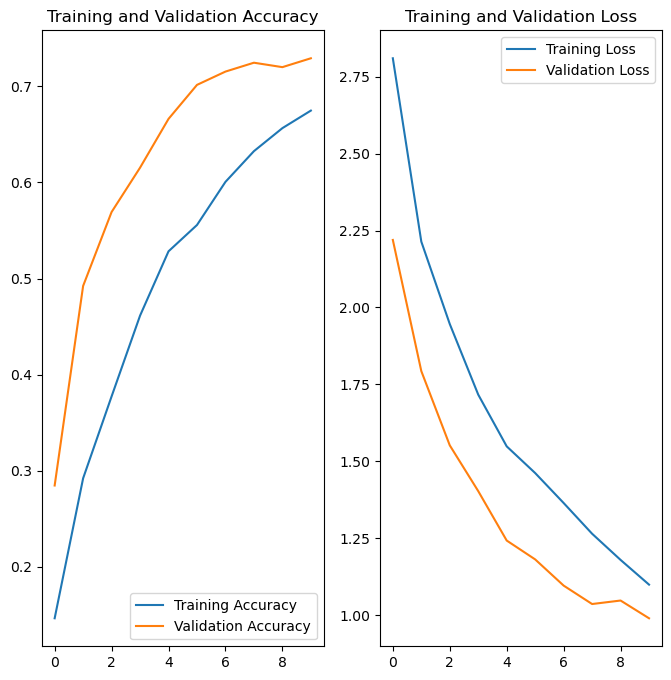

In [19]:
# Visualizing training results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

This code will generate a figure with two subplots:

The first subplot will display the training and validation accuracy over the 10 epochs.


The second subplot will display the training and validation loss over the 10 epochs.

# Prediction:

In [39]:
class_names = validation_generator.class_indices
classes = {value:key for key, value in class_names.items()}
print("Class Names\n", classes)

Class Names
 {0: 'cables', 1: 'case', 2: 'cpu', 3: 'gpu', 4: 'hdd', 5: 'headset', 6: 'keyboard', 7: 'microphone', 8: 'monitor', 9: 'motherboard', 10: 'mouse', 11: 'ram', 12: 'speakers', 13: 'webcam'}


This code will print out the class names along with their corresponding indices as inferred from the validation generator. The class_names variable contains a dictionary mapping class names to their integer indices, while the classes variable reverses this mapping, providing class indices as keys and class names as values.

In [27]:
from tensorflow.keras.preprocessing import image

In this cell, I am importing the image module from tensorflow.keras.preprocessing, which provides utilities for working with images, such as loading and preprocessing images for use with Keras models.

In [30]:
img = image.load_img(r"C:\Users\akshay wagh\Downloads\w300.png", target_size=(img_width, img_height))

In this cell, I am loading an image located at the specified path using the load_img function from the image module. I am also resizing the image to match the dimensions expected by my model, which are specified as img_width and img_height.

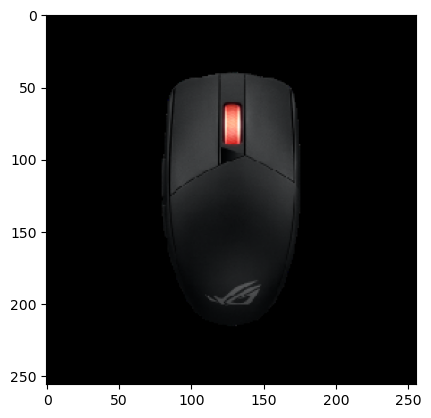

In [38]:
plt.imshow(img)
plt.show()

This code will display the loaded image using Matplotlib's imshow function.

In [36]:
img_arr = image.img_to_array(img)

This code converts the loaded image into a NumPy array using the img_to_array function from the image module. This is necessary because Keras models expect input data in the form of NumPy arrays.

In [31]:
img_arr = np.expand_dims(img_arr, axis=0)

Here, I am expanding the dimensions of the image array along the first axis using NumPy's expand_dims function. This is necessary to match the shape expected by my model, which requires a batch dimension even when processing a single image.






In [32]:
img_arr = img_arr / 255.


This code normalizes the pixel values of the image array by dividing them by 255. This ensures that the pixel values are in the range [0, 1], which is a common preprocessing step before feeding images into neural networks.

In [33]:
pred = model.predict(img_arr)

1/1 [==============================] - 12s 12s/step


This code generates predictions for the input image array using our trained model. The predict method of the model takes the input image array and returns the predicted probabilities for each class.






In [34]:
np.argmax(pred)

10

This code finds the index of the class with the highest predicted probability from the pred array using NumPy's argmax function. This index corresponds to the predicted class label for the input image.

In [46]:
print("The given image is of class:", classes[np.argmax(pred)])

The given image is of class: mouse



This code prints out the class label of the given image by retrieving the corresponding class name from the classes dictionary using the index of the highest predicted probability obtained earlier.

### Conclusion:

Based on the provided model performance metrics:

- **Training Loss: 1.0997**
- **Training Accuracy: 67.48%**
- **Validation Loss: 0.9904**
- **Validation Accuracy: 72.92%**

The model achieved a moderate training accuracy of approximately 67.48% and a validation accuracy of about 72.92%. This indicates that the model has learned to classify PC parts images to a reasonable extent, performing better than random guessing.